In [147]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from src.roc import plot_roc


/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
churn = pd.read_csv('data/churn.csv')
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [58]:
churn["Int'l Plan"] = churn["Int'l Plan"].map({'yes': True, 'no': False})
churn["VMail Plan"] = churn["VMail Plan"].map({'yes': True, 'no': False})
churn["Churn?"] = churn["Churn?"].map({'True.': True, 'False.': False})
del churn['State'], churn['Area Code'], churn['Phone']

churn.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
y = churn["Churn?"]
del churn["Churn?"]

In [62]:
X = churn.values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = RandomForestClassifier(n_estimators = 100, oob_score=True)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [86]:
sum(model.predict(X_test) == y_test)/len(y_test)

0.95563549160671468

In [87]:
sum(model.predict(X_train) == y_train)/len(y_train)

1.0

In [90]:
y_predict = model.predict(X_test)
conf = confusion_matrix(y_test, y_predict)

In [91]:
precision = float(conf[0][0]) / (conf[0][0] + conf[0][1])
recall = float(conf[0][0]) / (conf[0][0] + conf[1][0])

In [92]:
precision

0.99291784702549579

In [93]:
recall

0.95634379263301506

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
conf = confusion_matrix(y_test, y_predict)

In [83]:
precision = float(conf[0][0]) / (conf[0][0] + conf[0][1])
recall = float(conf[0][0]) / (conf[0][0] + conf[1][0])
precision

0.98888888888888893

In [84]:
recall

0.964769647696477

In [99]:
sorted(zip(model.feature_importances_,churn.columns))

[(0.020908814049759084, 'VMail Plan'),
 (0.026502002336461855, 'Eve Calls'),
 (0.029305013024115114, 'Account Length'),
 (0.030693569194145211, 'Day Calls'),
 (0.030747748556034266, 'VMail Message'),
 (0.031297826613157408, 'Night Calls'),
 (0.035446382541646171, 'Night Mins'),
 (0.03872063316859678, 'Night Charge'),
 (0.042109130978250253, 'Intl Mins'),
 (0.04279234744769829, 'Intl Charge'),
 (0.05884733453107218, 'Intl Calls'),
 (0.070351105198027328, 'Eve Charge'),
 (0.070636641753559465, 'Eve Mins'),
 (0.072826478577018766, "Int'l Plan"),
 (0.11365278759765732, 'CustServ Calls'),
 (0.14008448034225129, 'Day Mins'),
 (0.14507770409054913, 'Day Charge')]

In [121]:
p, r, a = [], [], []
sizes = [10, 20, 50, 100, 300, 500, 800, 1000]
X_train, X_test, y_train, y_test = train_test_split(X,y)
for size in sizes:
    model = RandomForestClassifier(n_estimators = size, oob_score=True)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    conf = confusion_matrix(y_test, y_predict)
    p.append(float(conf[0][0]) / (conf[0][0] + conf[0][1]))
    r.append(float(conf[0][0]) / (conf[0][0] + conf[1][0]))
    a.append(float(conf[0][0] + conf[1][1]) / conf.sum())

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


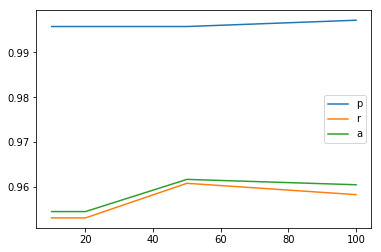

In [128]:
logsize = [np.log(x) for x in sizes]
fig, ax = plt.subplots(1,1)
plt.plot(sizes[:4], p[:4])
plt.plot(sizes[:4], r[:4])
plt.plot(sizes[:4], a[:4])
plt.legend(['p','r','a'])
plt.show()

In [131]:
p, r, a = [], [], []
X_train, X_test, y_train, y_test = train_test_split(X,y)
for mf in range(1,17):
    model = RandomForestClassifier(n_estimators = 50, oob_score=True, max_features = mf)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    conf = confusion_matrix(y_test, y_predict)
    p.append(float(conf[0][0]) / (conf[0][0] + conf[0][1]))
    r.append(float(conf[0][0]) / (conf[0][0] + conf[1][0]))
    a.append(float(conf[0][0] + conf[1][1]) / conf.sum())

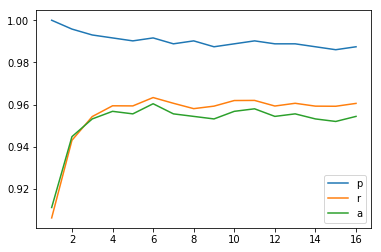

In [132]:
fig, ax = plt.subplots(1,1)
x = range(1,17)
plt.plot(x, p)
plt.plot(x, r)
plt.plot(x, a)
plt.legend(['p','r','a'])
plt.show()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
conf = confusion_matrix(y_test, y_predict)
precision = float(conf[0][0]) / (conf[0][0] + conf[0][1])
recall = (float(conf[0][0]) / (conf[0][0] + conf[1][0]))
accuracy = (float(conf[0][0] + conf[1][1]) / conf.sum())
print(precision, recall, accuracy)

0.972183588317 0.888182973316 0.870503597122


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
conf = confusion_matrix(y_test, y_predict)
precision = float(conf[0][0]) / (conf[0][0] + conf[0][1])
recall = (float(conf[0][0]) / (conf[0][0] + conf[1][0]))
accuracy = (float(conf[0][0] + conf[1][1]) / conf.sum())
print(precision, recall, accuracy)

0.944211994421 0.94950911641 0.908872901679


/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


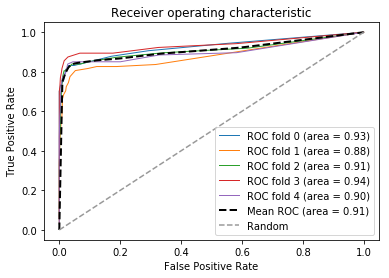

In [148]:
plot_roc(X,y, RandomForestClassifier, n_estimators = 20)

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


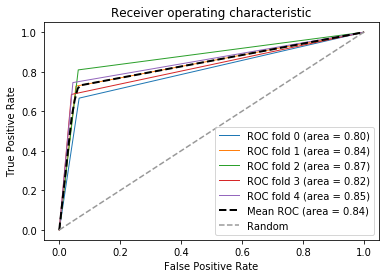

In [150]:
plot_roc(X,y, DecisionTreeClassifier)

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


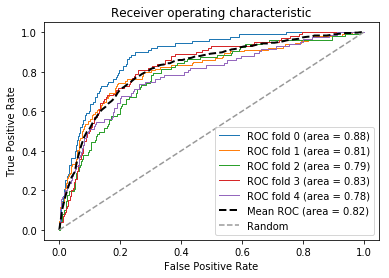

In [151]:
plot_roc(X,y, LogisticRegression)

In [152]:
churn.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [157]:
churn.corr()[churn.corr() > 0.7]

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l Plan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,NaN,NaN,1.000000,0.956927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,NaN,NaN,0.956927,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day Mins,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day Calls,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day Charge,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eve Mins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eve Calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eve Charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
churn.columns

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

In [161]:
Xnew = churn[['Account Length', "Int'l Plan", 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls']].values

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


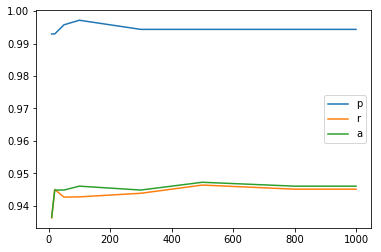

In [164]:
p, r, a = [], [], []
sizes = [10, 20, 50, 100, 300, 500, 800, 1000]
X_train, X_test, y_train, y_test = train_test_split(Xnew,y)
for size in sizes:
    model = RandomForestClassifier(n_estimators = size, oob_score=True)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    conf = confusion_matrix(y_test, y_predict)
    p.append(float(conf[0][0]) / (conf[0][0] + conf[0][1]))
    r.append(float(conf[0][0]) / (conf[0][0] + conf[1][0]))
    a.append(float(conf[0][0] + conf[1][1]) / conf.sum())
fig, ax = plt.subplots(1,1)
x = sizes
plt.plot(x, p)
plt.plot(x, r)
plt.plot(x, a)
plt.legend(['p','r','a'])
plt.show()

In [168]:
featureimportance = sorted(zip(model.feature_importances_,))

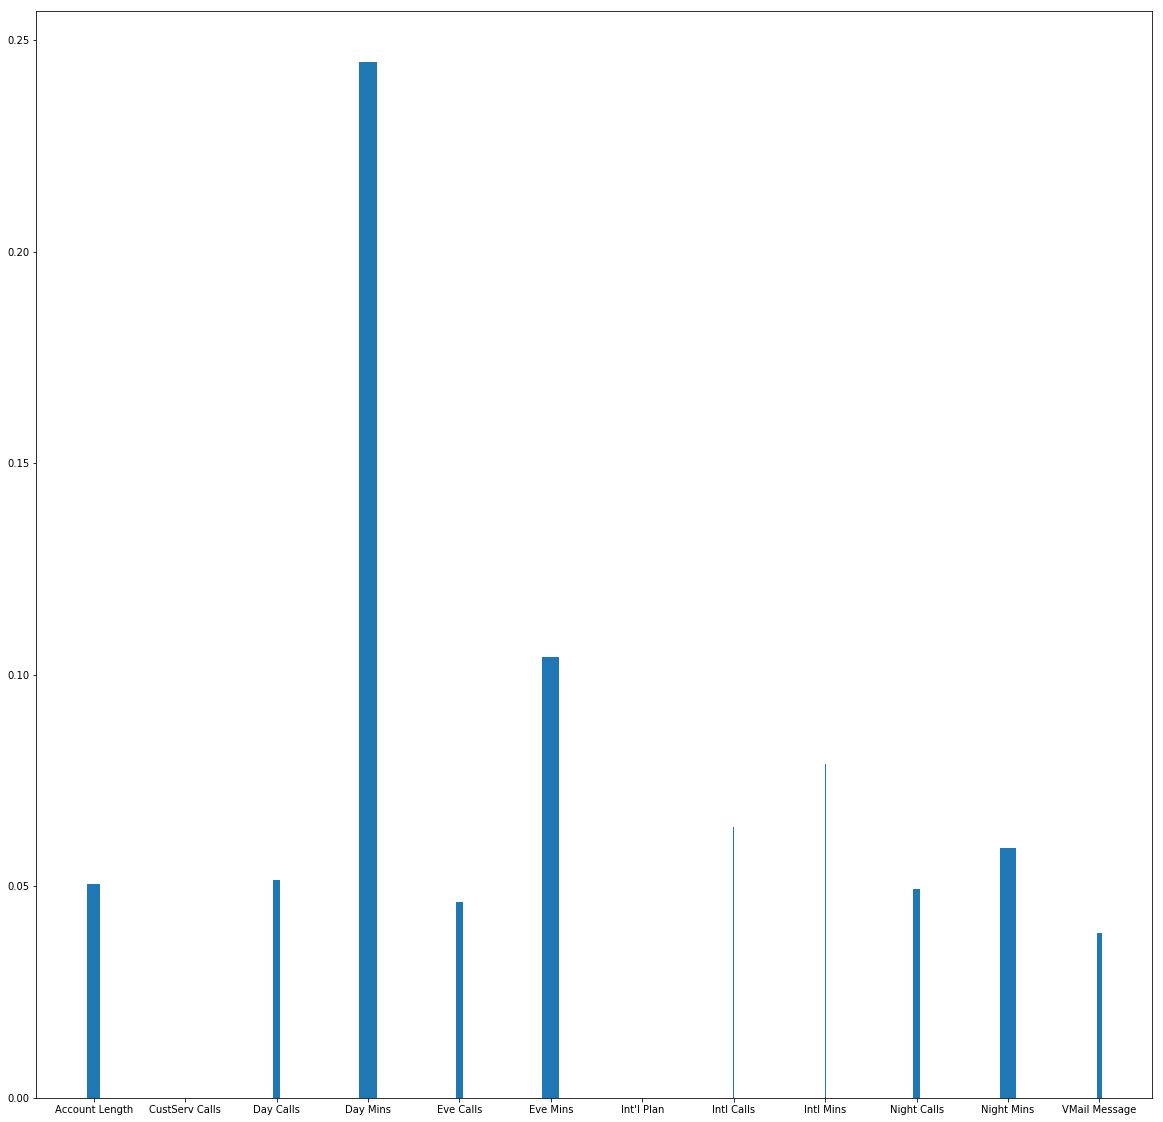

In [210]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.bar(['Account Length', "Int'l Plan", 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 
 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls'],
        model.feature_importances_, [np.std(i) for i in Xnew.T]/sum([np.std(i) for i in Xnew.T]))
plt.show()